## Task 2: Prediction using Unsupervised ML

In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Setting the theme
sns.set()


In [13]:
# Getting the data
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Displyaing the head of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum value of k 

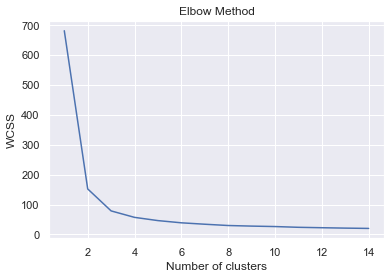

In [18]:
# Getting the train and test data
X = iris_df.to_numpy()

wcss = []

for k in range(1, 15):
    
    KMeans_model = KMeans(n_clusters=k, random_state=0)
    KMeans_model.fit(X)
    wcss.append(KMeans_model.inertia_)

# Plotting the wcss
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum cluster is where the elbow forms, in our cases it is 3. Hence the optimum cluster would be 3. 

In [26]:
# Preparing the model and using it for prediction
KMeans_model = KMeans(n_clusters=3, random_state=0)

y = KMeans_model.fit_predict(X)


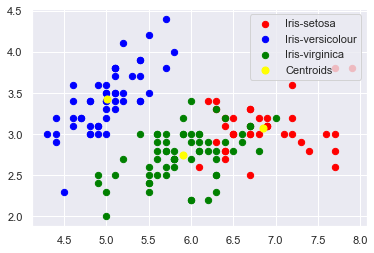

In [48]:
# Visualising the results 

labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']
colors = ['red', 'blue', 'green']

# Plotting the first two columns
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], s = 40, c = colors[i], label = labels[i])

# Plotting the centroid 
plt.scatter(KMeans_model.cluster_centers_[:, 0], KMeans_model.cluster_centers_[:, 1], s=50, c = 'yellow', label = 'Centroids')
    
plt.legend()